In [1]:
from generators.brownian_motion_generator import BrownianMotionDataset
from generators.poisson_process_generator import PoissonProcessDataset
from models.vanilla_transformer import TransformerModel
from probes.linear_probe import LinearProbe
import matplotlib.pyplot as plt
import torch
import pandas as pd

In [30]:
checkpoint_path = "/home/wojciech/private/magisterka/TFTS/training/transformer_stochastic_processes/8m8gd9lj/checkpoints/transformer-epoch=996-val_loss=0.10.ckpt"
# Load the trained model
model = TransformerModel.load_from_checkpoint(checkpoint_path)
dataloader = BrownianMotionDataset(batch_size=1, series_length=1000, subseries_length=50, stride=50, intensity_count=100, ranges={"means": (0, 0), "std": (80, 90)}).get_dataloader()
model.eval()

preds_list = []
labels_list = []

total_loss = 0.0
with torch.no_grad():
    for x, y in dataloader:
        x = x.float().to('cuda')
        y = dataloader.dataset.get_parameters(y)
        y = y.float().to('cuda')
        embeddings = model(x)
        preds_list.append(embeddings)
        labels_list.append(y)

/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [31]:
# Flatten the results and prepare data for DataFrame
preds_array = [pred.squeeze(0).tolist() for pred in preds_list]
mean_std_array = [label.squeeze(0).tolist() for label in labels_list]
embedding_columns = {f"embedding_{i}": [embedding[i] for embedding in preds_array] for i in range(128)}

df = pd.DataFrame({
    **embedding_columns,
    "Mean": [mean_std[0] for mean_std in mean_std_array],
    "Std": [mean_std[1] for mean_std in mean_std_array]
})

In [32]:
df

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_120,embedding_121,embedding_122,embedding_123,embedding_124,embedding_125,embedding_126,embedding_127,Mean,Std
0,-0.015815,0.085113,0.015821,-0.016135,-0.110200,0.103162,-0.039005,0.239132,-0.137335,-0.053575,...,-0.004988,0.101552,-0.006766,-0.110782,0.091734,-0.078395,-0.044223,-0.000655,0.0,80.706993
1,-0.015672,0.088134,0.013796,-0.015331,-0.106782,0.102432,-0.039878,0.246096,-0.134606,-0.054949,...,-0.001481,0.101880,-0.002426,-0.112419,0.089384,-0.077033,-0.049414,0.000871,0.0,80.706993
2,-0.020354,0.073606,0.016708,-0.020233,-0.116163,0.105736,-0.034001,0.237932,-0.136507,-0.046953,...,-0.009391,0.100051,-0.008706,-0.111131,0.094153,-0.077453,-0.048969,-0.004013,0.0,80.706993
3,-0.018454,0.081859,0.018919,-0.015818,-0.112795,0.106079,-0.042333,0.244296,-0.138356,-0.048045,...,-0.010517,0.098190,-0.009425,-0.115008,0.093025,-0.076593,-0.049066,-0.000181,0.0,80.706993
4,-0.022474,0.072325,0.018951,-0.019721,-0.119132,0.105063,-0.041768,0.240764,-0.134822,-0.040820,...,-0.015293,0.101236,-0.012251,-0.115706,0.098857,-0.078293,-0.044968,-0.003772,0.0,84.098289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.020406,0.078302,0.016083,-0.018742,-0.112320,0.106967,-0.033485,0.241615,-0.134222,-0.050068,...,-0.006609,0.100477,-0.008758,-0.111277,0.091756,-0.078607,-0.049182,-0.004330,0.0,89.047623
396,-0.021852,0.071588,0.017915,-0.019961,-0.117140,0.106996,-0.039637,0.242981,-0.134204,-0.044512,...,-0.010663,0.103183,-0.010137,-0.114663,0.096780,-0.077432,-0.047519,-0.003521,0.0,81.457909
397,-0.023918,0.073788,0.016511,-0.019680,-0.114431,0.106664,-0.037594,0.240486,-0.134401,-0.046493,...,-0.008880,0.099751,-0.011492,-0.111937,0.093669,-0.078326,-0.049383,-0.003577,0.0,81.457909
398,-0.017463,0.084345,0.014343,-0.015080,-0.109608,0.102961,-0.037965,0.237838,-0.135081,-0.054654,...,-0.002695,0.102155,-0.005863,-0.110123,0.090608,-0.079760,-0.044100,0.000091,0.0,81.457909


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


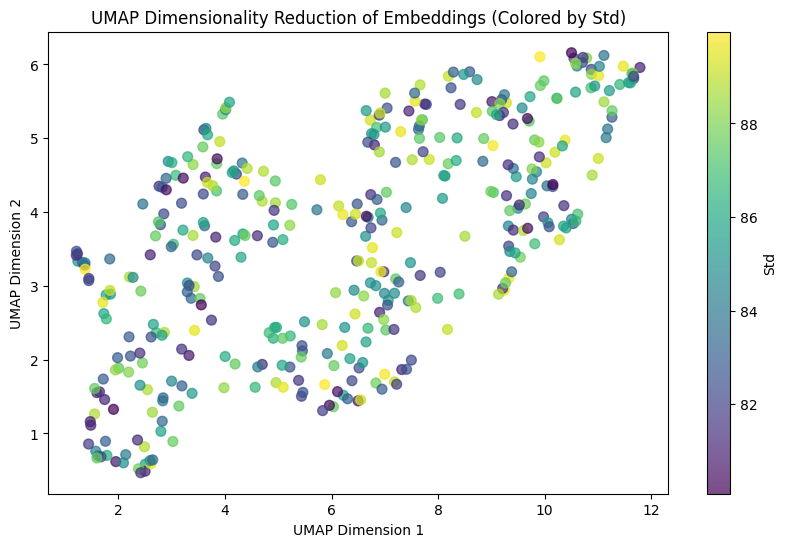

In [33]:
# Using UMAP with umap-learn package (correct import)
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Apply UMAP to reduce embeddings to 2 dimensions
embedding_matrix = df[[f"embedding_{i}" for i in range(128)]].values
reducer = umap.UMAP(n_components=2, random_state=42)
umap_results = reducer.fit_transform(embedding_matrix)

# Create a scatter plot with color representing the 'Std' value
plt.figure(figsize=(10, 6))
scatter = plt.scatter(umap_results[:, 0], umap_results[:, 1], c=df["Std"], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Std')
plt.title('UMAP Dimensionality Reduction of Embeddings (Colored by Std)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


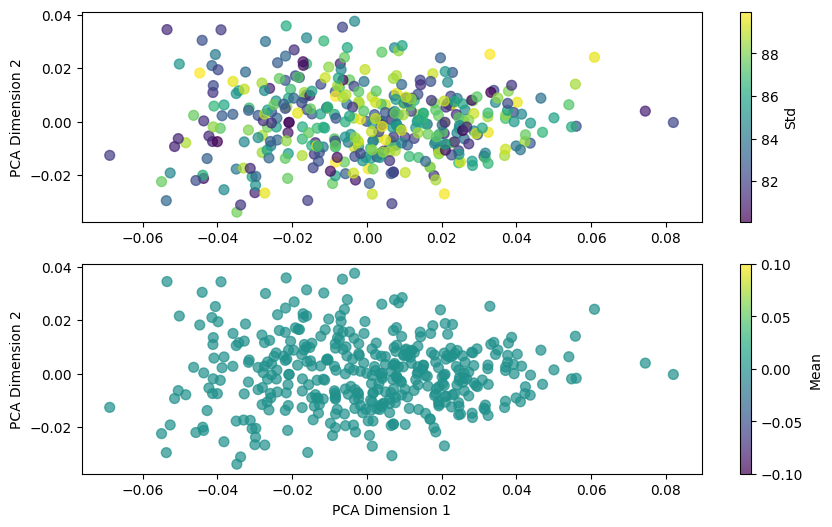

In [34]:
from sklearn.decomposition import PCA

# Apply PCA to reduce embeddings to 2 dimensions
pca = PCA(n_components=2)
pca_results = pca.fit_transform(embedding_matrix)

# Create a scatter plot with color representing the 'Std' value
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 6))
scatter = ax1.scatter(pca_results[:, 0], pca_results[:, 1], c=df["Std"], cmap='viridis', s=50, alpha=0.7)
scatter2 = ax2.scatter(pca_results[:, 0], pca_results[:, 1], c=df["Mean"], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Std')
plt.colorbar(scatter2, label='Mean')

plt.xlabel('PCA Dimension 1')
ax1.set_ylabel('PCA Dimension 2')
ax2.set_ylabel('PCA Dimension 2')
plt.show()
